<a href="https://colab.research.google.com/github/Ankitkumar1015/Gender-recognition/blob/main/gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [ ]:
data_dir = '/content/drive/MyDrive/Ml/gender. google - Copy'

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 832 images belonging to 2 classes.
Found 208 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 253s 8s/step - accuracy: 0.7824 - loss: 0.6134 - val_accuracy: 0.8646 - val_loss: 0.4219
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 254ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.4358
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8733 - loss: 0.3808 - val_accuracy: 0.8698 - val_loss: 0.4148
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.5348
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8712 - loss: 0.3968 - val_accuracy: 0.8646 - val_loss: 0.4244
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.4349
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8695 - loss: 0.3839 - val_accuracy: 0.8698 - val_loss: 0.4192
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.5295
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.8657 - loss: 0.3901 - val_accu

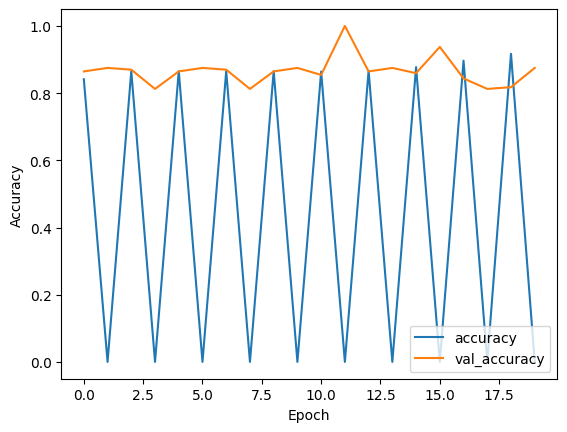

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


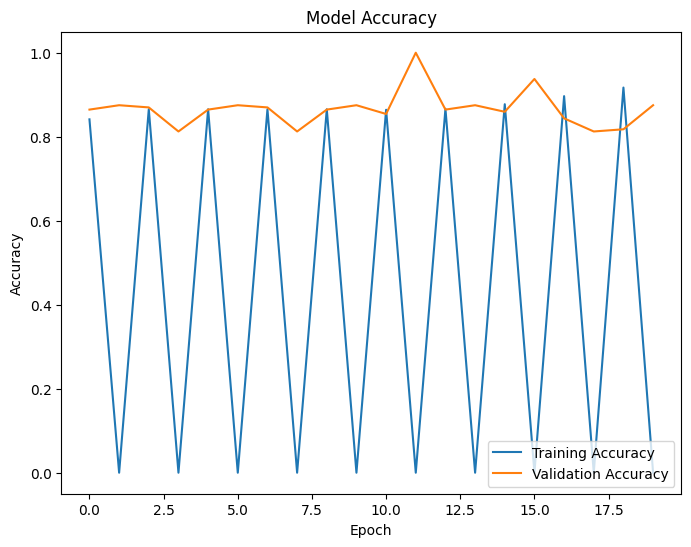

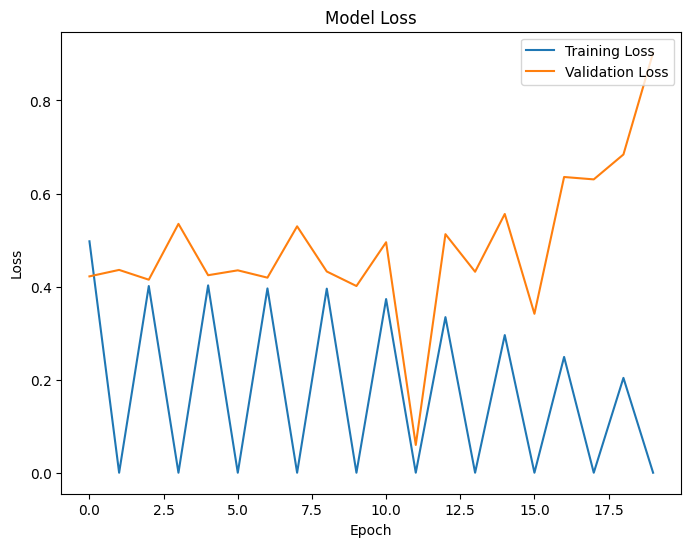

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 441ms/step - accuracy: 0.8253 - loss: 0.7376
Validation Loss: 0.700689435005188
Validation Accuracy: 0.8221153616905212


In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')


In [ ]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_generator)

# Print the accuracy in percentage
accuracy_percentage = accuracy * 100
print(f'Validation Accuracy: {accuracy_percentage:.2f}%')


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 764ms/step - accuracy: 0.8254 - loss: 0.6649
Validation Accuracy: 82.21%


In [ ]:
model.save('gender_classification_model.h5')


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30  # You can adjust the number of epochs as needed
)


Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9381 - loss: 0.1667 - val_accuracy: 0.8281 - val_loss: 0.9308
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 1.4069
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9614 - loss: 0.0956 - val_accuracy: 0.8177 - val_loss: 0.8772
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 2.8277
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.9748 - loss: 0.0749 - val_accuracy: 0.7812 - val_loss: 1.0902
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.3746
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9858 - loss: 0.0474 - val_accuracy: 0.8177 - val_loss: 1.2215
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 -

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9980 - loss: 0.0102 - val_accuracy: 0.8281 - val_loss: 2.0799
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 4.0763
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 0.8229 - val_loss: 2.1981
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6875 - val_loss: 3.3010
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.8229 - val_loss: 2.5988
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 3.2689
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8073 - val_loss: 2.8081
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 -

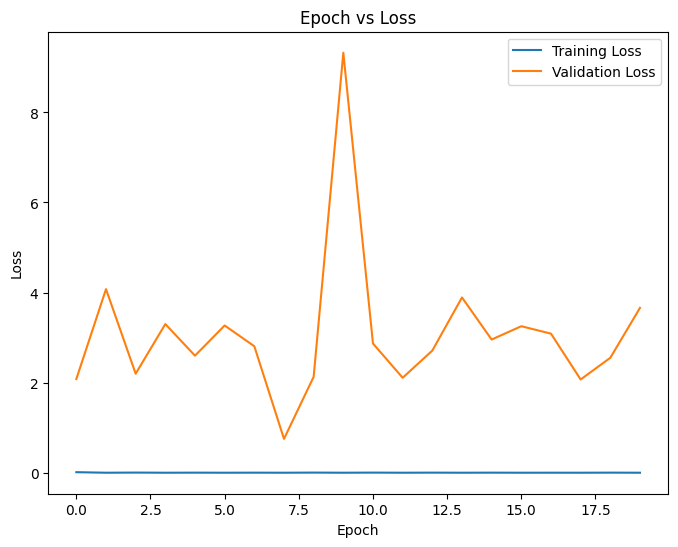

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [20]:
# Get the true labels and the predicted labels
validation_generator.reset()
predictions = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
predicted_classes = np.where(predictions > 0.5, 1, 0).flatten()
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 703ms/step


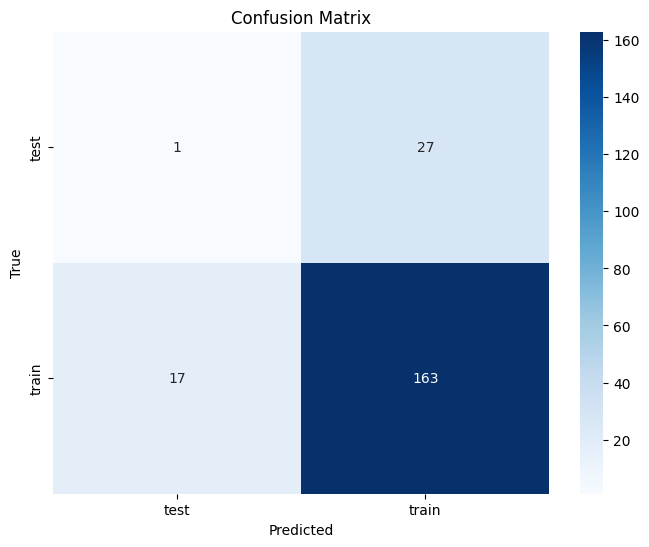

              precision    recall  f1-score   support

        test       0.06      0.04      0.04        28
       train       0.86      0.91      0.88       180

    accuracy                           0.79       208
   macro avg       0.46      0.47      0.46       208
weighted avg       0.75      0.79      0.77       208



In [21]:
# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Optionally, you can also print a classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


In [23]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [24]:
precision = precision_score(true_classes, predicted_classes, average='binary')
print(f'Precision: {precision:.2f}')

Precision: 0.86


In [26]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc

In [27]:
fpr, tpr, _ = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)

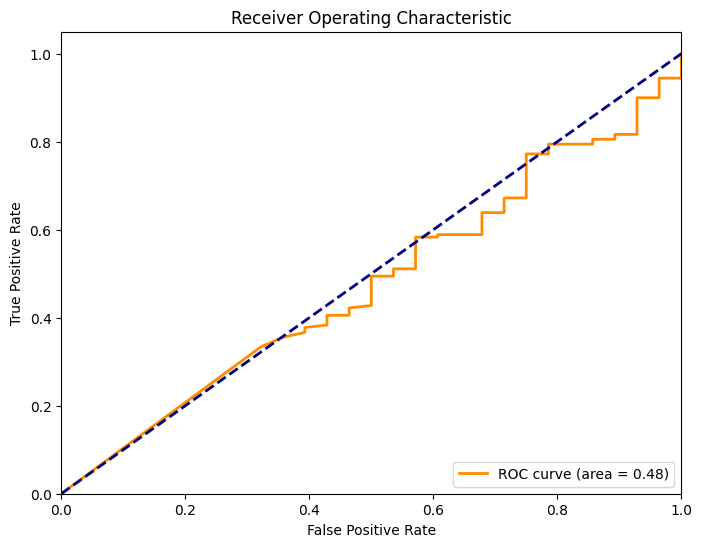

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()